# "Data mining final project - suin Kang"

* [1. 주제 및 목적, 배경](#a)
* [2. 확진자 전국 분포 살펴보기](#b)
* [3. 감염사례](#c)
* [4. 감염사례 별 확진자의 이동지역](#d)
* [5. 요약 및 결론](#e)
* [6. 활용방안](#f)
* [7. 아쉬운 점](#g)
* [8. 출처](#h)

제 컴퓨터에서는 목차를 잘 찾아가지는 못하는 것 같습니다. 그래서 순서대로 주석을 달아놓았으니 `ctrl+f`를 이용하여 각 순서를 확인해주시면 좋을 것 같습니다.

### 1. 주제 및 목적, 배경 <a class="anchor" id="a"></a>

데이콘 - 코로나 데이터 시각화 AI 경진대회

주제 : 코로나 데이터 시각화를 통해 코로나 확산을 방지하고 예방 또는 대처할 수 있는 인사이트 도출하기

배경 : 코로나 확진자가 증가함에 따라 사회적으로 코로나에 대처할 수 있는 방안을 마련하는 것이 세계적인 사회문제가 되었다.

목적 : 코로나 시각화를 통해 코로나 확산에 대처하기 위해서

### 부제 :  코로나 증가에 어떤 요소들이 영향을 끼칠까

In [4]:
import pandas as pd
import pydeck as pdk
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### 2. 확진자 전국 분포 살펴보기 <a class="anchor" id="b"></a>

확진자 전국 분포를 살펴보기 위해 데이콘에서 주어진 Case.csv파일을 사용하였다.

In [5]:
df = pd.read_csv("C:/Users/Kangdaeyong/Desktop/datamining/프로젝트/covid_19_dataset/Case.csv")
df

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387
3,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209
4,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374
...,...,...,...,...,...,...,...,...
169,6100012,Gyeongsangnam-do,-,False,etc,20,-,-
170,7000001,Jeju-do,-,False,overseas inflow,14,-,-
171,7000002,Jeju-do,-,False,contact with patient,0,-,-
172,7000003,Jeju-do,-,False,etc,4,-,-


dydeck의 Gridlayer를 사용하기 위해서 위경도 데이터에 결측값을 제거할 것이다.

여기서는 결측값 na대신 하이픈(-)으로 대처되어있어서 하이픈을 가진 위경도 행들을 모두 제거해주었다.

In [6]:
df1=df.drop(df[df['latitude']=='-'].index, axis=0)
df1

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387
3,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209
4,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374
...,...,...,...,...,...,...,...,...
160,6100003,Gyeongsangnam-do,Jinju-si,True,Wings Tower,9,35.164845,128.126969
161,6100004,Gyeongsangnam-do,Geochang-gun,True,Geochang-gun Woongyang-myeon,8,35.805681,127.917805
162,6100005,Gyeongsangnam-do,Changwon-si,True,Hanmaeum Changwon Hospital,7,35.22115,128.6866
163,6100006,Gyeongsangnam-do,Changnyeong-gun,True,Changnyeong Coin Karaoke,7,35.54127,128.5008


이제 시각화하면서 필요한 확인된 누적확진자 수를 나타내는 confirmed열, 위경도를 나타내는 latitude, longitutde열만 추출하여 df1로 저장해주었다.

In [7]:
df1= df1[['confirmed','latitude','longitude']]
df1.head(60)

,confirmed,latitude,longitude
0,139,37.538621,126.992652
1,119,37.48208,126.901384
2,95,37.508163,126.884387
3,43,37.546061,126.874209
4,43,37.679422,127.044374
5,41,37.481059,126.894343
7,17,37.592888,127.056766
9,30,37.481735,126.930121
10,14,37.63369,126.9165
11,13,37.55713,127.0403


dydeck 패키지를 사용하려면 csv파일이 아닌 json파일이 필요했기때문에 위에서 만든 df1을 json형식으로 다시 저장해주었다.

In [8]:
df1.to_json("C:/Users/Kangdaeyong/Desktop/datamining/프로젝트/확장자변경/casejson.json")

위에서 만든 json파일을 이용하여 pydeck의 Gridlayer를 활용하여 전국의 확진자 분포가 어떻게 되는지 살펴보았다.

In [9]:
"""
GridLayer
============

Locations of bike parking within San Francisco.

Adapted from the deck.gl documentation.
"""

import pydeck as pdk
import pandas as pd


df = pd.read_json("C:/Users/Kangdaeyong/Desktop/datamining/프로젝트/확장자변경/casejson.json")

# Define a layer to display on a map

layer = pdk.Layer(
    "GridLayer", df, pickable=True, extruded=True, cell_size=5000, elevation_scale=50, get_position=["longitude","latitude"],
)

view_state = pdk.ViewState(latitude=37.538621, longitude=126.992652, zoom=5, bearing=0, pitch=45)

# Render
r = pdk.Deck(layers=[layer], initial_view_state=view_state, tooltip={"text": "{position}\nCount: {count}"},)
r.to_html("grid_layer.html")

#### 전국확진자 분포를 살펴본 결과 수도권에 가장 많은 확진자가 분포하며 다음으로는 대구와 대전이 많다는 것을 알 수 있었다.

### 3. 감염사례 <a class="anchor" id="c"></a>

Infection_case를 4가지 유형으로 나누어 어떤 유형이 코로나에 더 많이 걸리는지

감염사례에 대한 데이터가 있는 PatientInfo.csv를 활용하였으며 이는 데이콘에서 주어진 데이터이다.

여기서는 Patient_id, infection_case를 주로 사용하였으며 Patient_id는 환자의 고유 id이며 infection_case는 감염사례를 나타낸 열이다.

In [10]:
p_info=pd.read_csv("C:/Users/Kangdaeyong/Desktop/datamining/프로젝트/covid_19_dataset/PatientInfo.csv")
p_info

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5160,7000000015,female,30s,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,25,NaN,2020-05-30,2020-06-13,NaN,released
5161,7000000016,NaN,NaN,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-16,2020-06-24,NaN,released
5162,7000000017,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,72,NaN,2020-06-18,NaN,NaN,isolated
5163,7000000018,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated


감염사례를 나타내는 infection_case열의 고유한 값들이 몇 개나 있는지 확인해보았다.

In [11]:
len(p_info['infection_case'].unique())

52

그 결과 52개나 되는 값들이 있었고 이들의 공통점들을 찾아 몇 가지로 분류해보기 위해 아래와 같이 가장 많은 비율을 차지하는 것부터 확인해보았다.

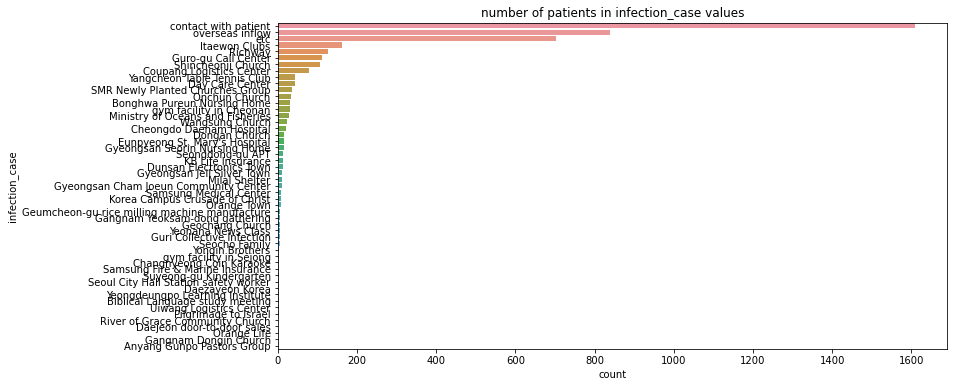

In [12]:
g=p_info.groupby(['infection_case'])['patient_id'].count()
g=g.reset_index()
g.rename(columns={'patient_id':'count'}, inplace=True)

g= g.sort_values('count',ascending=False)

plt.figure(figsize=(12,6))
plt.title('number of patients in infection_case values')
sns.barplot(y = 'infection_case',x='count',data=g)
display()

In [13]:
g=p_info.groupby(['infection_case'])['patient_id'].count()
g=g.reset_index()
g.rename(columns={'patient_id':'count'}, inplace=True)

g= g.sort_values('count',ascending=False)
g[:3][:]

,infection_case,count
46,contact with patient,1610
50,overseas inflow,840
47,etc,703


개인감염을 뜻하는 contact with patient값을 가지는 행이 1610행으로 가장 많았으며

해외유입으로 인한 감염을 뜻하는 overseas inflow값을 가지는 행이 840행으로 두 번째를 차지했다.

경로를 알 수 없는 감염을 뜻하는 etc가 703행으로 세 번째로 많았다.

In [14]:
g

,infection_case,count
46,contact with patient,1610
50,overseas inflow,840
47,etc,703
21,Itaewon Clubs,162
30,Richway,128
17,Guro-gu Call Center,112
38,Shincheonji Church,107
5,Coupang Logistics Center,80
42,Yangcheon Table Tennis Club,44
8,Day Care Center,43


위에서 개인감염(contact with patient), 해외유입(overseas inflow), 경로를 알 수 없는 감염(etc) 순으로 가장 많았으며 

g데이터프레임을 살펴보면 이외의 값들은 집단감염으로 간주할 만한 장소에서 감염된 것을 확인할 수 있었다.

따라서 개인감염, 해외유입, 경로를 알 수 없는 감염, 집단감염으로 나누어 다시 값을 할당해주기로 했다.

그리고 개인감염, 해외유입, 경로를 알 수 없는 감염 이외의 모든 값들을 집단감염으로 간주하기로 하며 

확진자 수가 5명이 되지 않는다면 해당 행은 제거하여주었다.

이렇게 적은 값들을 제거한 이유는 집단감염으로 간주할 항목들인데 비해 너무 적어서 집단감염이라고 할 수 없다고 생각했기 때문이다.

또한 굳이 '5명'을 기준으로 한 것은 5인 이상 집합 금지를 시행했었기 때문이다.

#### 다음은 집단감염사례로 들어갈 행들의 확진자 수가 5명 미만인 데이터들을 살펴본 것이다.

In [15]:
g = p_info.groupby(['infection_case'])['patient_id'].count()
g = pd.DataFrame(g)

infection_case_less_than_5 = g[g['patient_id'] < 5].index.tolist()
g[g.index.isin(infection_case_less_than_5)]

,patient_id
infection_case,
Anyang Gunpo Pastors Group,1
Biblical Language study meeting,3
Changnyeong Coin Karaoke,4
Daejeon door-to-door sales,1
Daezayeon Korea,3
Gangnam Dongin Church,1
Orange Life,1
Pilgrimage to Israel,2
River of Grace Community Church,1


In [16]:
len(g[g.index.isin(infection_case_less_than_5)])

16

위와 같이 삭제하게 된 행은 16행이다.

아래는 5명보다 적은 확진자 수를 가진 행들을 제거한 데이터프레임이다.

In [17]:
g = g[g['patient_id']>5]
g

,patient_id
infection_case,
Bonghwa Pureun Nursing Home,31
Cheongdo Daenam Hospital,21
Coupang Logistics Center,80
Day Care Center,43
Dongan Church,17
Dunsan Electronics Town,13
Eunpyeong St. Mary's Hospital,16
Gangnam Yeoksam-dong gathering,6
Geochang Church,6


위에서 infection_case를 확인할 때 na값은 확인하지 않았다. na값을 경로를 알 수 없는 감염유형인 'etc'와 같은 것으로 간주한다.

In [18]:
p_info[p_info['infection_case'].isna()].shape

(919, 14)

na값이 919행으로 꽤 많은 것을 알 수 있다.

이제 infection_case에서 나왔던 52가지 고유한 값들을 개인감염, 집단감염, 해외유입, 경로를 알 수 없는 감염 4가지로 나누어 나타내기 위해서 infection_case_cate열을 만들어준다.

In [19]:
# 새로운 카테고리 넣을 열을 만들어줌
p_info['infection_case_cate']= 0

for문과 if문을 사용하여 overseas inflow를 overseas로, cantact with patient를 individual로, etc를 unknown으로, na값도 unknown으로 바꿔주었다.

그 이외의 5명이 되지 않아 작은 값들을 제거한 행들을 제외하고 위에 해외유입, 개인감염, 알 수 없음을 제외하고 남은 행들은 모두 집단감염으로 값을 할당해주었다.

In [20]:
for i in range(len(p_info)):
    if p_info['infection_case'][i] == 'overseas inflow':
        p_info['infection_case_cate'][i]='overseas'

    
    elif p_info['infection_case'][i] == 'contact with patient':
        p_info['infection_case_cate'][i] = 'individual'
    
    
    elif p_info['infection_case'][i] == 'etc':
        p_info['infection_case_cate'][i] = 'unknown'

    elif pd.isna(p_info['infection_case'][i])==True:
        p_info['infection_case_cate'][i] = 'unknown'
    
    else:
        p_info['infection_case_cate'][i] = 'group'

p_info

<ipython-input-20-1e6da899e0ff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_info['infection_case_cate'][i]='overseas'
c:\Users\Kangdaeyong\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
<ipython-input-20-1e6da899e0ff>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_info['infection_case_cate'][i] = 'individual'
<ipython-in

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,infection_case_cate
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released,overseas
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released,overseas
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released,individual
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released,overseas
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released,individual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5160,7000000015,female,30s,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,25,NaN,2020-05-30,2020-06-13,NaN,released,overseas
5161,7000000016,NaN,NaN,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-16,2020-06-24,NaN,released,overseas
5162,7000000017,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,72,NaN,2020-06-18,NaN,NaN,isolated,overseas
5163,7000000018,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated,overseas


감염사례의 결과를 확인해본 결과 unknown(경로를 알 수 없는 유형)이 1622명으로 가장 많았으며, individual(개인감염)유형이 1610명으로 그 다음으로 많았다. 

group(집단감염)이 1093으로 세 번째로 많았으며, overseas(해외유입)이 840명으로 네 가지 유형 중 가장 적은 것을 알 수 있었다.

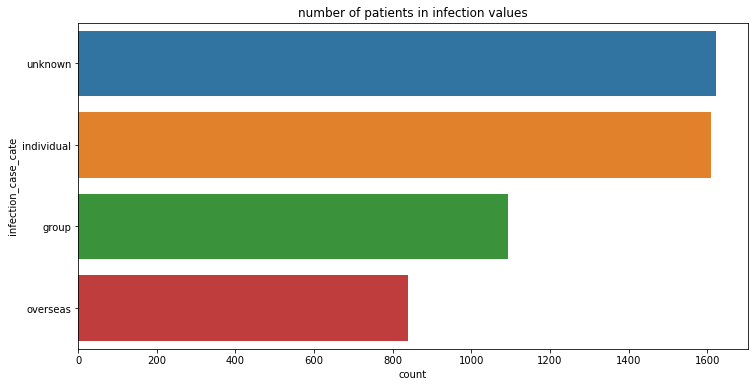

In [21]:
g = p_info.groupby(['infection_case_cate'])['patient_id'].count()
g = g.reset_index()
g.rename(columns = {'patient_id':'count'}, inplace=True)

g=g.sort_values('count',ascending=False)

plt.figure(figsize = (12,6))
sns.barplot(y='infection_case_cate',x='count',data=g)
plt.title('number of patients in infection values')
display()

In [22]:
g

,infection_case_cate,count
3,unknown,1622
1,individual,1610
0,group,1093
2,overseas,840


### 4. 감염사례 별 확진자의 이동지역 <a class="anchor" id="d"></a>

#### 감염경로의 유형별로 전국적으로 얼마나 퍼져있는지 살펴보기 위해서 patientinfo.csv와 patientroute.csv를 patient_id를 기준으로 join시킨 후에 감염카테고리 별로 어느지역에서 많이 이동하였는지(어느 지역을 다니면서 확진되었는지 알아보고자) 알아보려고 한다.

- 해외유입(overseas)

In [23]:
route=pd.read_csv("C:/Users/Kangdaeyong/Desktop/datamining/프로젝트/covid_19_dataset/PatientRoute.csv")
route

,patient_id,global_num,date,province,city,type,latitude,longitude
0,1000000001,2.0,2020-01-22,Gyeonggi-do,Gimpo-si,airport,37.615246,126.715632
1,1000000001,2.0,2020-01-24,Seoul,Jung-gu,hospital,37.567241,127.005659
2,1000000002,5.0,2020-01-25,Seoul,Seongbuk-gu,etc,37.592560,127.017048
3,1000000002,5.0,2020-01-26,Seoul,Seongbuk-gu,store,37.591810,127.016822
4,1000000002,5.0,2020-01-26,Seoul,Seongdong-gu,public_transportation,37.563992,127.029534
...,...,...,...,...,...,...,...,...
6709,6100000090,NaN,2020-03-24,Seoul,Gangseo-gu,airport,37.558655,126.794474
6710,6100000090,NaN,2020-03-24,Busan,Gangseo-gu,airport,35.173220,128.946459
6711,6100000090,NaN,2020-03-25,Gyeongsangnam-do,Yangsan-si,store,35.336944,129.026389
6712,6100000090,NaN,2020-03-25,Gyeongsangnam-do,Yangsan-si,hospital,35.335757,129.025003


시각화 left_join에 필요한 patient_id열과 시각화할 때 필요한 위경도 열을 추출하여 route에 다시 할당해준다

In [24]:
route = route[['patient_id','latitude','longitude']]

left_join할 때 필요한 patient_id열과 시각화할 때 필요한 infection_case_cate열을 뽑아 p_info에 다시 할당해준다

In [25]:
p_info= p_info[['patient_id','infection_case_cate']]

pydeck을 이용해 시각화하기 위해 위경도 데이터가 없는 가공한 patient_info 데이터에 가공한 route데이터를 left_join으로 붙인다.

이때 patientinfo데이터와 patientroute데이터를 합친 것을 info_route에 할당해주었다.

In [26]:
info_route=pd.merge(p_info,route,left_on="patient_id",right_on="patient_id",how="left")
info_route

,patient_id,infection_case_cate,latitude,longitude
0,1000000001,overseas,37.615246,126.715632
1,1000000001,overseas,37.567241,127.005659
2,1000000002,overseas,37.592560,127.017048
3,1000000002,overseas,37.591810,127.016822
4,1000000002,overseas,37.563992,127.029534
...,...,...,...,...
10663,7000000015,overseas,NaN,NaN
10664,7000000016,overseas,NaN,NaN
10665,7000000017,overseas,NaN,NaN
10666,7000000018,overseas,NaN,NaN


감염사례 중 overseas(해외유입)만 추출한 것

In [27]:
overseas=info_route[info_route['infection_case_cate']=="overseas"]
overseas

,patient_id,infection_case_cate,latitude,longitude
0,1000000001,overseas,37.615246,126.715632
1,1000000001,overseas,37.567241,127.005659
2,1000000002,overseas,37.592560,127.017048
3,1000000002,overseas,37.591810,127.016822
4,1000000002,overseas,37.563992,127.029534
...,...,...,...,...
10663,7000000015,overseas,NaN,NaN
10664,7000000016,overseas,NaN,NaN
10665,7000000017,overseas,NaN,NaN
10666,7000000018,overseas,NaN,NaN


In [28]:
# 한 행당 1을 넣어주기 위해 추가한 코드
#overseas['n']=1
#overseas

In [29]:
overseas=overseas.dropna(axis=0)
overseas

,patient_id,infection_case_cate,latitude,longitude
0,1000000001,overseas,37.615246,126.715632
1,1000000001,overseas,37.567241,127.005659
2,1000000002,overseas,37.592560,127.017048
3,1000000002,overseas,37.591810,127.016822
4,1000000002,overseas,37.563992,127.029534
...,...,...,...,...
10601,6100000090,overseas,37.558655,126.794474
10602,6100000090,overseas,35.173220,128.946459
10603,6100000090,overseas,35.336944,129.026389
10604,6100000090,overseas,35.335757,129.025003


In [30]:
overseas.to_json("C:/Users/Kangdaeyong/Desktop/datamining/프로젝트/확장자변경/overseas.json")

In [31]:
"""
GridLayer
============

Locations of bike parking within San Francisco.

Adapted from the deck.gl documentation.
"""

import pydeck as pdk
import pandas as pd


df = pd.read_json("C:/Users/Kangdaeyong/Desktop/datamining/프로젝트/확장자변경/overseas.json")

# Define a layer to display on a map

layer = pdk.Layer(
    "GridLayer", df, pickable=True, extruded=True, cell_size=5000, elevation_scale=50, get_position=["longitude","latitude"],
)

view_state = pdk.ViewState(latitude=37.538621, longitude=126.992652, zoom=5, bearing=0, pitch=45)

# Render
r = pdk.Deck(layers=[layer], initial_view_state=view_state, tooltip={"text": "{position}\nCount: {count}"},)
r.to_html("grid_layer.html")

확진 유형이 해외유입인 경우에는 수도권을 많이 돌아다녔으며, 
다음으로는 부산 지역을 많이 돌아다닌 것으로 보인다.
이외의 군산, 대전, 대구, 광주, 울산 등도 조금씩 이동한 것을 확인할 수 있었다.
따라서 앞의 수도권과 대구, 대전 지역에서 확진자가 나온 시각화를 보고 수도권 확진자들이 해외유입의 영향을 받았으며 대구나 대전 지역에도 미미하지만 조금의 영향은 주었을 것이다.

- 개인감염(individual)

In [32]:
route=pd.read_csv("C:/Users/Kangdaeyong/Desktop/datamining/프로젝트/covid_19_dataset/PatientRoute.csv")
route

# patientinfo.csv와 patientroute.csv를 patient_id열을 이용해 leftjoin으로 합쳐줌
info_route=pd.merge(p_info,route,left_on="patient_id",right_on="patient_id",how="left")
info_route

# infection_case_cate열에서 individual(개인감염)만 추출
info_route=info_route[info_route['infection_case_cate']=="individual"]

# 시각화에 필요한 열만 추출
individual=info_route[['infection_case_cate','latitude','longitude']]

# 시각화 과정에서 오류나지 않도록 na값 제거
individual=individual.dropna(axis=0)
individual

,infection_case_cate,latitude,longitude
15,individual,37.586288,126.999716
16,individual,37.572950,126.979358
18,individual,37.612772,127.098167
19,individual,37.641141,126.791968
20,individual,37.641141,126.791968
...,...,...,...
10548,individual,35.628721,128.494005
10549,individual,35.805533,127.917805
10550,individual,35.805371,127.917761
10551,individual,35.805371,127.917761


In [33]:
# pydeck을 이용해 시각화하기 위해 json파일로 저장해서 내보내기
individual.to_json("C:/Users/Kangdaeyong/Desktop/datamining/프로젝트/확장자변경/individual.json")

In [34]:
"""
GridLayer
============

Locations of bike parking within San Francisco.

Adapted from the deck.gl documentation.
"""

import pydeck as pdk
import pandas as pd


df = pd.read_json("C:/Users/Kangdaeyong/Desktop/datamining/프로젝트/확장자변경/individual.json")

# Define a layer to display on a map

layer = pdk.Layer(
    "GridLayer", df, pickable=True, extruded=True, cell_size=5000, elevation_scale=50, get_position=["longitude","latitude"],
)

view_state = pdk.ViewState(latitude=37.538621, longitude=126.992652, zoom=5, bearing=0, pitch=45)

# Render
r = pdk.Deck(layers=[layer], initial_view_state=view_state, tooltip={"text": "{position}\nCount: {count}"},)
r.to_html("grid_layer.html")

개인감염으로 인해 확진된 사람들의 이동경로를 시각화한 것이며 이를 통해
수도권과 안동, 아산시, 원주 부산, 광주, 대구, 부산, 포항, 대전 등을 이동한 것을 알 수 있으며 개인감염을 통해 수도권이 영향을 많이 받은 것을 알 수 있다.
그리고 해외유입 유형보다 대전과 대구에 더 많은 영향을 주었을 것으로 보인다.

- 집단감염

In [35]:
route=pd.read_csv("C:/Users/Kangdaeyong/Desktop/datamining/프로젝트/covid_19_dataset/PatientRoute.csv")
route

# patientinfo.csv와 patientroute.csv를 patient_id열을 이용해 leftjoin으로 합쳐줌
info_route=pd.merge(p_info,route,left_on="patient_id",right_on="patient_id",how="left")
info_route


# infection_case_cate열에서 group(집단감염)만 추출
info_route=info_route[info_route['infection_case_cate']=="group"]

# 시각화에 필요한 열만 추출
group=info_route[['infection_case_cate','latitude','longitude']]

# 시각화 과정에서 오류나지 않도록 na값 제거
group=group.dropna(axis=0)
group

,infection_case_cate,latitude,longitude
74,group,37.539738,127.053101
75,group,37.557082,127.040100
76,group,37.554934,127.036743
77,group,37.589283,127.064555
78,group,37.600026,127.106862
...,...,...,...
10533,group,35.392352,128.481636
10534,group,35.388459,128.475257
10535,group,35.388960,128.477074
10536,group,35.388960,128.477074


In [36]:
# pydeck을 이용해 시각화하기 위해 json파일로 저장해서 내보내기
group.to_json("C:/Users/Kangdaeyong/Desktop/datamining/프로젝트/확장자변경/group.json")

In [37]:
"""
GridLayer
============

Locations of bike parking within San Francisco.

Adapted from the deck.gl documentation.
"""

import pydeck as pdk
import pandas as pd


df = pd.read_json("C:/Users/Kangdaeyong/Desktop/datamining/프로젝트/확장자변경/group.json")

# Define a layer to display on a map

layer = pdk.Layer(
    "GridLayer", df, pickable=True, extruded=True, cell_size=5000, elevation_scale=50, get_position=["longitude","latitude"],
)

view_state = pdk.ViewState(latitude=37.538621, longitude=126.992652, zoom=5, bearing=0, pitch=45)

# Render
r = pdk.Deck(layers=[layer], initial_view_state=view_state, tooltip={"text": "{position}\nCount: {count}"},)
r.to_html("grid_layer.html")

집단감염으로 인해 확진된 사람들이 이동한 지역은 역시 가장 많은 쪽은 수도권이었으며 아산시, 원주, 부산이 있었으며 가장 앞에서 본 시각화에서 확진자들을 수도권을 이동한 인구들의 영향을 많이 받았을 것으로 유추할 수 있다.

- unknown(감염경로를 알 수 없는 유형)

In [38]:
route=pd.read_csv("C:/Users/Kangdaeyong/Desktop/datamining/프로젝트/covid_19_dataset/PatientRoute.csv")
route

# patientinfo.csv와 patientroute.csv를 patient_id열을 이용해 leftjoin으로 합쳐줌
info_route=pd.merge(p_info,route,left_on="patient_id",right_on="patient_id",how="left")
info_route


# infection_case_cate열에서 unknown만 추출
info_route=info_route[info_route['infection_case_cate']=="unknown"]

# 시각화에 필요한 열만 추출
unknown=info_route[['infection_case_cate','latitude','longitude']]

# 시각화 과정에서 오류나지 않도록 na값 제거
unknown=unknown.dropna(axis=0)
unknown

,infection_case_cate,latitude,longitude
86,unknown,37.608987,126.928346
87,unknown,37.609001,126.928168
88,unknown,37.587132,126.931976
89,unknown,37.578419,126.909956
90,unknown,37.556997,126.937738
...,...,...,...
10594,unknown,35.236901,128.642847
10595,unknown,35.236140,128.675229
10596,unknown,35.227956,128.685595
10597,unknown,35.333368,128.497988


In [39]:
# pydeck을 이용해 시각화하기 위해 json파일로 저장해서 내보내기
unknown.to_json("C:/Users/Kangdaeyong/Desktop/datamining/프로젝트/확장자변경/unknown.json")

In [40]:
"""
GridLayer
============

Locations of bike parking within San Francisco.

Adapted from the deck.gl documentation.
"""

import pydeck as pdk
import pandas as pd


df = pd.read_json("C:/Users/Kangdaeyong/Desktop/datamining/프로젝트/확장자변경/unknown.json")

# Define a layer to display on a map

layer = pdk.Layer(
    "GridLayer", df, pickable=True, extruded=True, cell_size=5000, elevation_scale=50, get_position=["longitude","latitude"],
)

view_state = pdk.ViewState(latitude=37.538621, longitude=126.992652, zoom=5, bearing=0, pitch=45)

# Render
r = pdk.Deck(layers=[layer], initial_view_state=view_state, tooltip={"text": "{position}\nCount: {count}"},)
r.to_html("grid_layer.html")

알 수 없는 경로로 확진된 환자들이 경로로 수도권, 대구, 부산, 포항이 있다.
전국 중 수도권과 대구에 영향을 미친 것으로 보인다.

### 5. 요약 및 결론 <a class="anchor" id="e"></a>

1. 전국적인 확진자 분포를 보았을 때 수도권에 가장 많은 확진자가 분포하며 다음으로는 대구와 대전이 많다.
2. 감염사례 4가지는 감염경로 알 수 없음(unknown), 개인감염(individual), 집단감염(group), 해외유입(overseas) 순으로 많이 나타났다.
3. 해외유입 유형이 서울과 대구, 대전에 모두 영향을 끼쳤으며 대구와 대전은 수도권에 비해 적은 영향을 끼쳤을 것으로 예상된다.
4. 집단감염 유형이 서울에 영향을 끼친 것으로 보인다
5. 개인감염은 서울에 영향을 끼친 것으로 보인다.
6. 감염경로를 알 수 없는 유형은 서울과 대구에 영향을 끼친 것으로 보인다.

### 6. 활용방안 <a class="anchor" id="f"></a>

해외유입 유형이 영향을 끼친 서울, 대구, 대전에는 해외에 다녀온 사람들에 대해서 조금 더 활동반경을 제한하는 정책을 시행하면 좋을 것이다.

집단감염 유형이 서울에 영향을 끼친 것을 감안하여 서울에 집합금지 인원을 더 적게 하는 것처럼 모임에 대한 제한이 다른 지역에 비해 조금 더 가해진다면 코로나 예방을 도울 수 있을 것이다.

개인감염이 서울에 영향을 끼친 것으로 보아 위와 같이 집합 인원을 줄이거나 친구들, 친척들, 종교 등으로 인해 마스크를 벗고 만날 가능성이 있는 모임들을 제한하는 것이 도움이 될 수 있을 것이다.

### 7. 아쉬운 점 <a class="anchor" id="g"></a>

감염사례를 4가지 유형으로 나누어 조사할 때 알 수 없는 경로로 감염된 유형의 수가 너무 많이 차지하여 아쉬웠다. 

감염사례 별 이동지역을 pydeck의 arclayer를 이용해서 나타내보려고 했으나 성공하지 못했다.

결론을 가지고 활용할 수 있는 것이 많지 않을 것 같아 아쉬웠다.

### 8. 출처 <a class="anchor" id="h"></a>



https://dacon.io/competitions/official/235590/data

https://dacon.io/competitions/official/235590/codeshare/949?page=1&dtype=recent